In [2]:
import pandas as pd 
import seaborn as sns
import warnings
import numpy as np
import sounddevice as sd

In [3]:
warnings.filterwarnings('ignore')

In [4]:
btc_raw_data=pd.read_csv('btc.csv')

In [5]:
btc_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4994 non-null   object 
 1   Open    4994 non-null   float64
 2   High    4994 non-null   float64
 3   Low     4994 non-null   float64
 4   Close   4994 non-null   float64
 5   Volume  4988 non-null   float64
dtypes: float64(5), object(1)
memory usage: 234.2+ KB


In [6]:
btc_raw_data.nunique()

Date      4994
Open      4028
High      4033
Low       4029
Close     4031
Volume    4820
dtype: int64

In [7]:
btc_raw_data.head(3)

,Date,Open,High,Low,Close,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,80.0
1,2010-07-19,0.1,0.1,0.1,0.1,570.0
2,2010-07-20,0.1,0.1,0.1,0.1,260.0


In [8]:
btc_raw_data['Date']=pd.to_datetime(btc_raw_data['Date'])

In [9]:
btc_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4994 non-null   datetime64[ns]
 1   Open    4994 non-null   float64       
 2   High    4994 non-null   float64       
 3   Low     4994 non-null   float64       
 4   Close   4994 non-null   float64       
 5   Volume  4988 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 234.2 KB


In [10]:
btc_raw_data.tail(3)

,Date,Open,High,Low,Close,Volume
4991,2024-03-17,65316.3,68845.7,64545.3,68390.6,4.471686e+10
4992,2024-03-18,68371.3,68897.1,66594.2,67548.6,4.926158e+10
4993,2024-03-19,67556.1,68106.9,61536.2,61912.8,7.421584e+10


In [11]:
# let's calculate the daily gap between 'Open' and 'Close' costs and add this data as a column by the name 'Daily Gap'

In [12]:
btc_raw_data.insert(5, 'Daily Gap', btc_raw_data['Close']-btc_raw_data['Open'])

In [14]:
btc_raw_data.head(3)

,Date,Open,High,Low,Close,Daily Gap,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,0.1,80.0
1,2010-07-19,0.1,0.1,0.1,0.1,0.0,570.0
2,2010-07-20,0.1,0.1,0.1,0.1,0.0,260.0


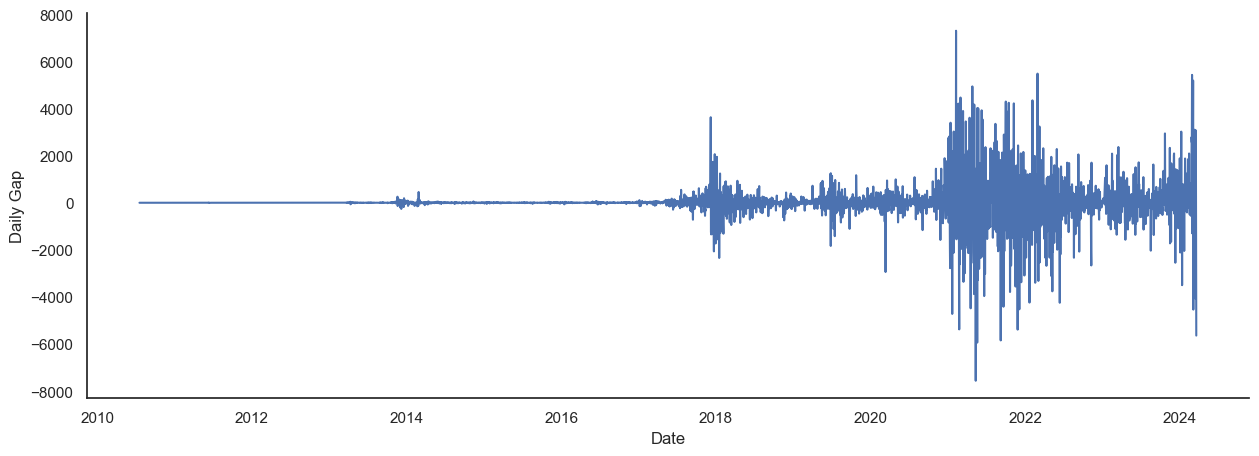

In [15]:
sns.set_theme(style='white', rc={'figure.figsize':(15,5)})
sns.lineplot(
    data=btc_raw_data,
    x='Date',
    y='Daily Gap'
)
sns.despine()

In [16]:
# I am going to convert this data (Daily Gap) to a sound.

In [29]:
sample_rate = 44100
note_duration = 0.001
fade_duration = 0.001 

In [30]:
def generate_smooth_1bit_samples(freq):
    t = np.linspace(0, note_duration, int(note_duration * sample_rate), False)
    fade_out = np.exp(-(t - (note_duration - fade_duration)) / fade_duration)
    samples = 32767.0 * np.where(t % (1 / freq * 2) < (1 / freq), 1, -1) * fade_out
    return np.array(samples, dtype=np.int16)

In [31]:
melody_data=btc_raw_data[btc_raw_data['Daily Gap']!=0]['Daily Gap']

In [32]:
melody=melody_data.values.tolist()

In [33]:
all_samples = np.concatenate([generate_smooth_1bit_samples(freq) for freq in melody])

In [34]:
sd.play(all_samples, samplerate=sample_rate)
sd.wait()